In [1]:
import pandas, numpy, qnorm

In [2]:
import scipy, scipy.signal
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.90, 9 * 0.90)})

# user-defined variables

In [4]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

input_files = [positive_input_file, negative_input_file, basic_input_file]
labels = ['positive', 'negative', 'basic']

# read metadata

In [5]:
path = input_dir + basic_input_file
metadata = pandas.read_excel(input_dir+positive_input_file, sheet_name=0, index_col=1)

new_labels = [element.split('_')[0] for element in metadata.index.values]
rosetta = dict(zip(metadata.index.values, new_labels))
metadata.rename(index=rosetta, inplace=True)
metadata.head()

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1


In [6]:
metadata

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
A312,PMUEC_INTRA_EC008_243,A312_neg,4,4,0,1,0,0,300000,HILIC_POS_10min,33,2
A348,PMUEC_INTRA_EC008_244,A348_neg,4,4,0,1,0,10,300000,HILIC_POS_10min,34,2
008-33,PMUEC_INTRA_EC008_245,008-33,3,0,0,3,0,0,25000,HILIC_POS_10min,35,2


# broadly exploring distributions

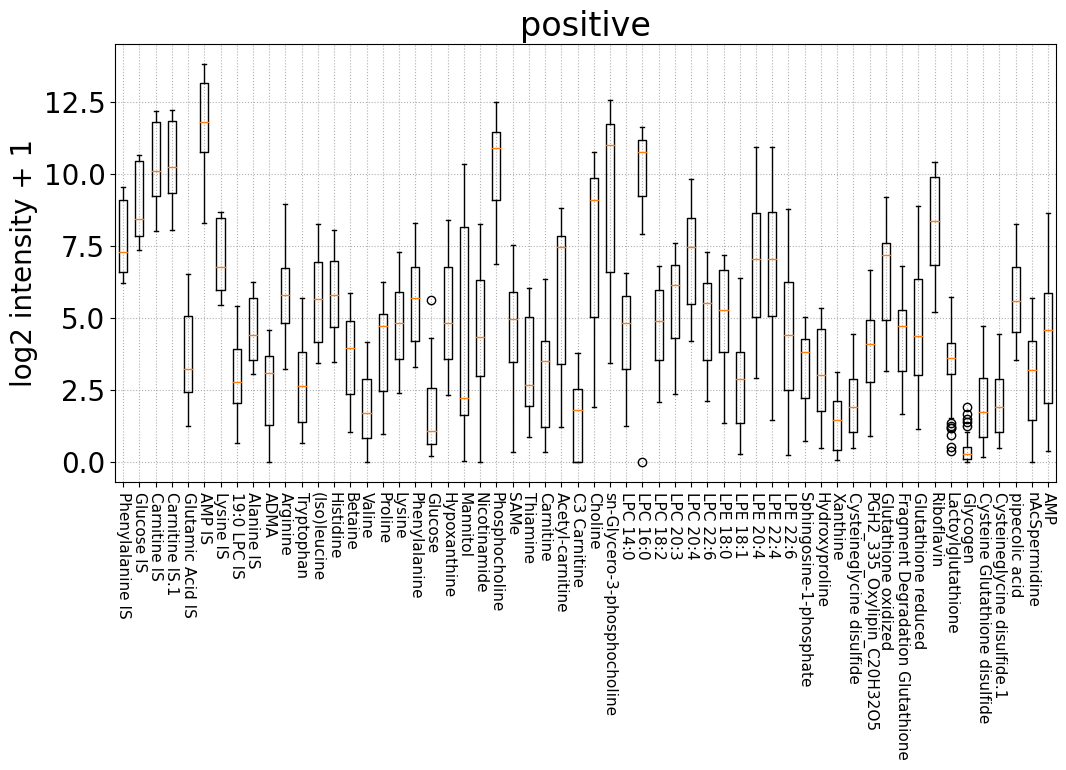

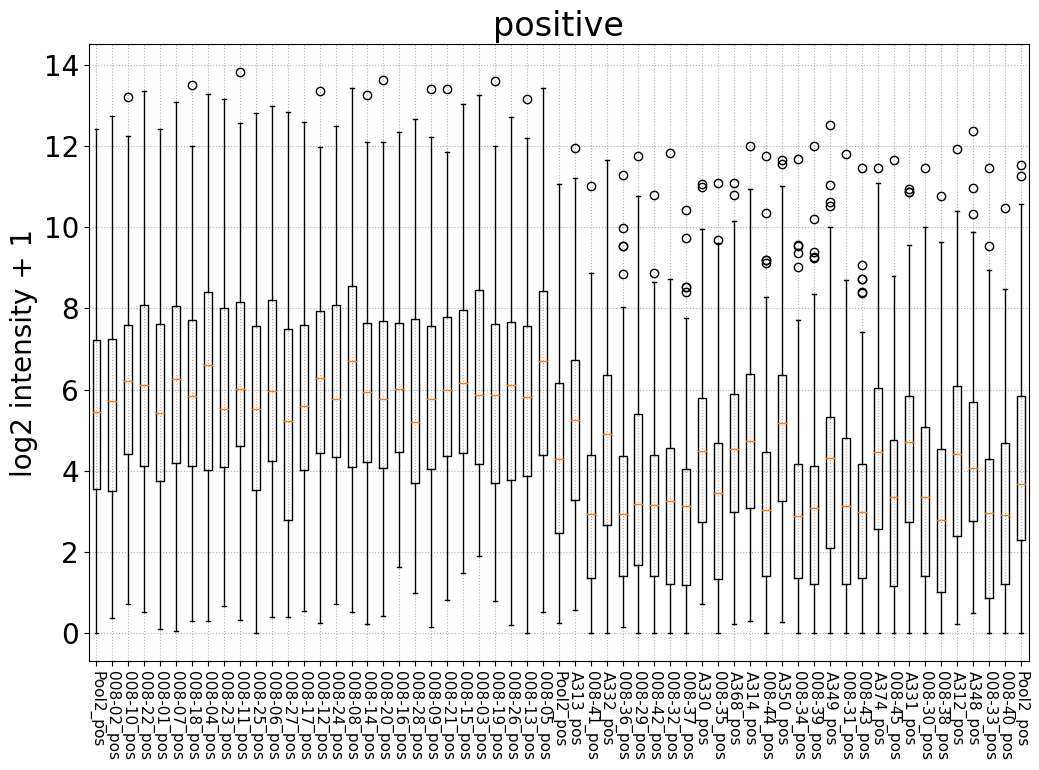

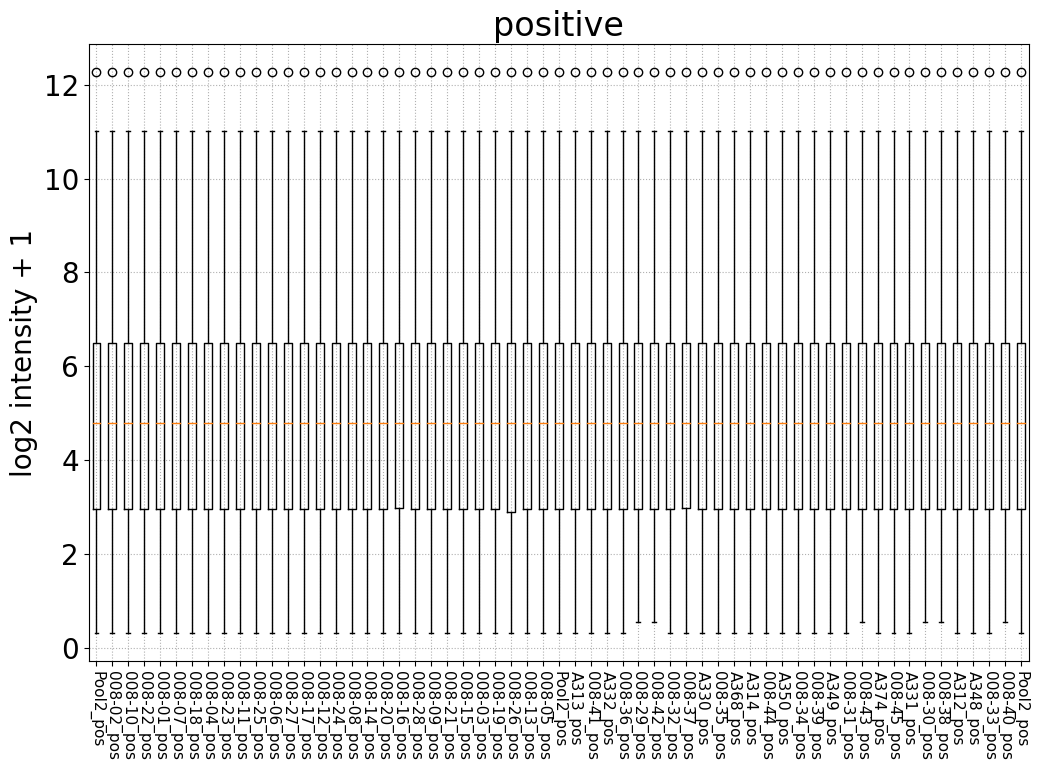

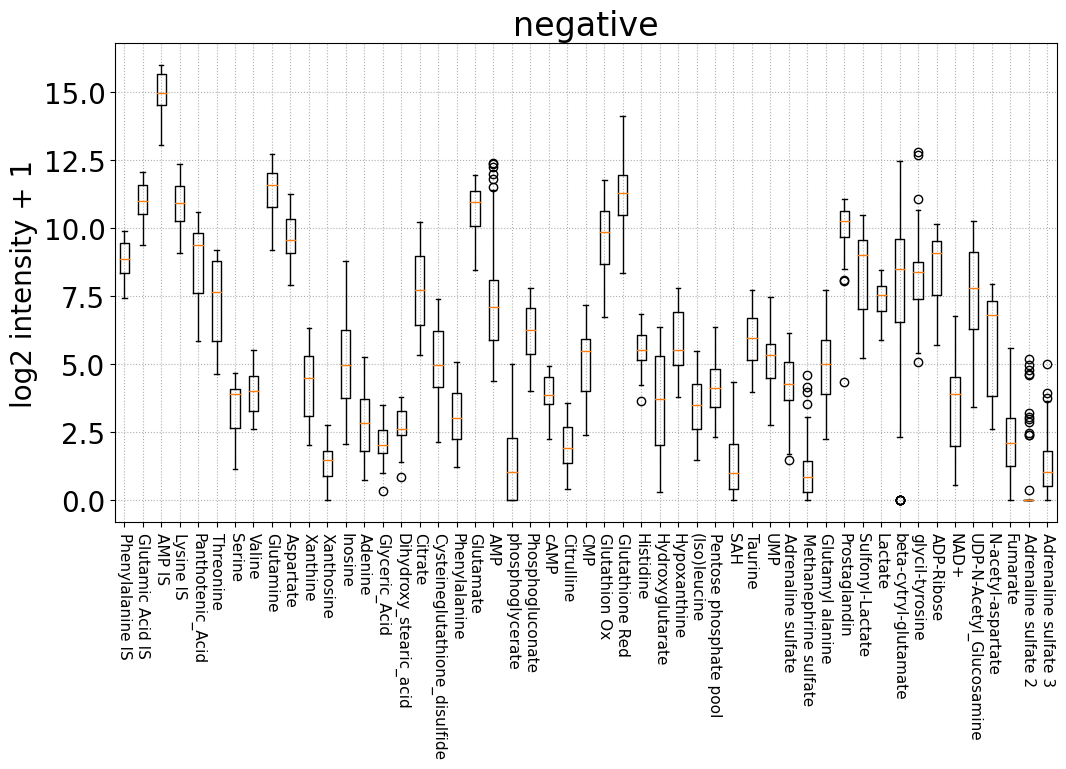

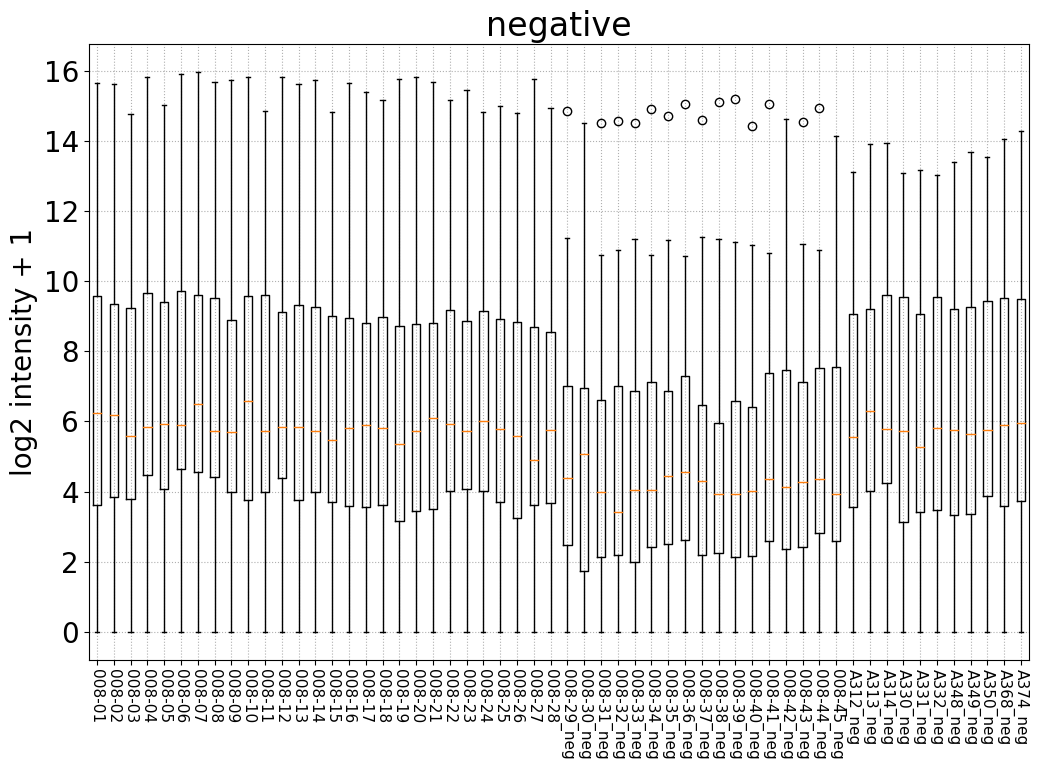

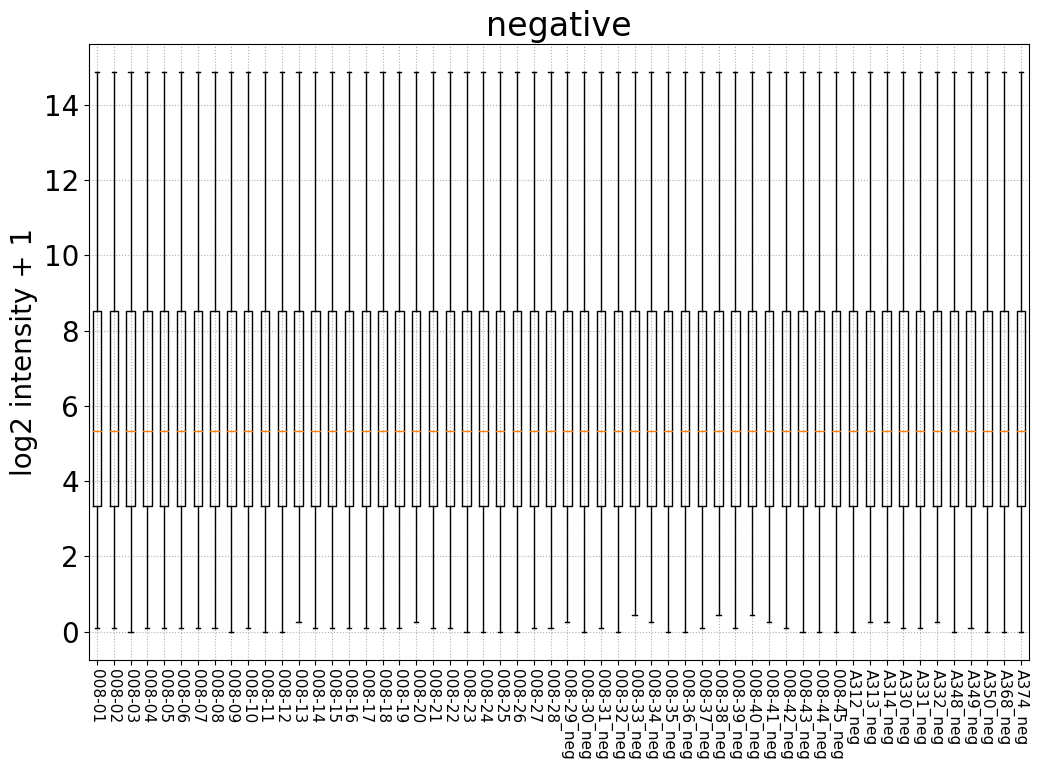

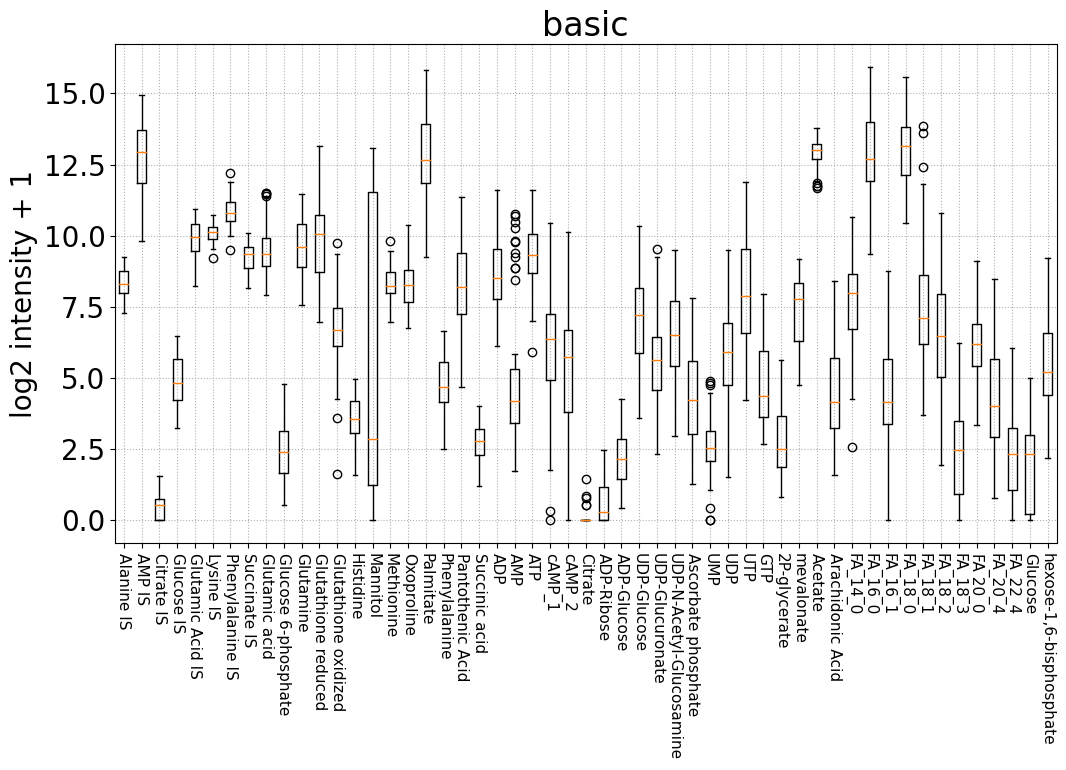

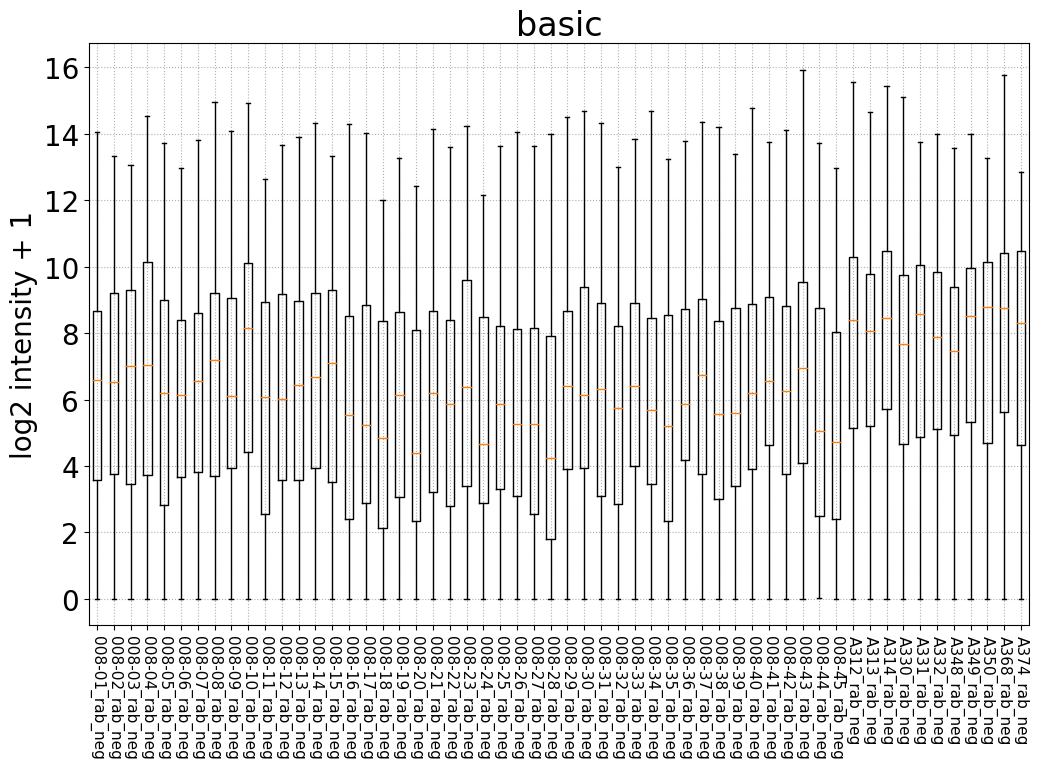

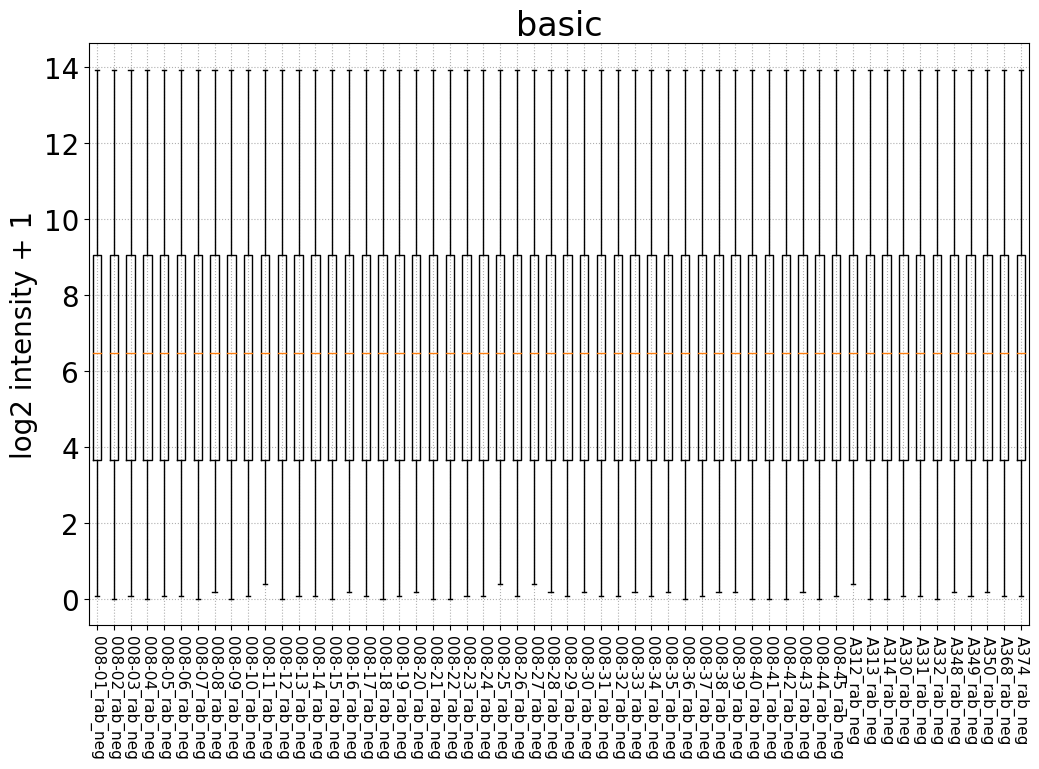

In [7]:
all_dfs = []
for i in range(len(input_files)):

    input_file = input_files[i]
    label = labels[i]
    
    path = input_dir + input_file
    df = pandas.read_excel(path, sheet_name=1, index_col=0)
    
    log2intensity = numpy.log2(df+1)

    #
    # display metabolite distributions
    #
    matplotlib.pyplot.boxplot(log2intensity)

    matplotlib.pyplot.xticks(range(1,len(df.columns)+1), df.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')

    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    #
    # show sample distributions
    #
    log_df = numpy.log2(df+1)
    transpose = log2intensity.transpose()

    matplotlib.pyplot.boxplot(transpose)
    matplotlib.pyplot.xticks(range(1,len(transpose.columns)+1), transpose.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')
    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    #
    # perform quantile normalization
    #
    qndf = qnorm.quantile_normalize(transpose, axis=1)

    matplotlib.pyplot.boxplot(qndf)
    matplotlib.pyplot.xticks(range(1,len(qndf.columns)+1), qndf.columns, rotation=-90, fontsize=11)
    matplotlib.pyplot.ylabel('log2 intensity + 1')
    matplotlib.pyplot.title(label)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    all_dfs.append(qndf)

The conclusion from these figures is that:
- quantification units are intensities.
- quantification is not quantitative.
- we need quantile normalization.

# visualize PCA of samples

## fix df indexes to map metadata

In [8]:
for df in all_dfs:
    new_labels = [element.split('_')[0] for element in df.columns.values]
    rosetta = dict(zip(df.columns.values, new_labels))
    df.rename(columns=rosetta, inplace=True)  

In [9]:
metadata.index

Index(['Pool1', 'Pool1', 'Pool1', 'Pool2', '008-02', '008-10', '008-22',
       '008-01', '008-07', '008-18', 'Pool2', '008-04', '008-23', '008-11',
       '008-25', '008-06', '008-27', 'Pool2', '008-17', '008-12', '008-24',
       '008-08', '008-14', 'Pool2', '008-20', '008-16', '008-28', '008-09',
       '008-21', '008-15', 'Pool2', '008-03', '008-19', '008-26', '008-13',
       '008-05', 'Pool2', 'Pool1', 'Pool1', 'Pool1', 'Pool2', 'A313', '008-41',
       'A332', '008-36', '008-29', '008-42', 'Pool2', '008-32', '008-37',
       'A330', '008-35', 'A368', 'A314', 'Pool2', '008-44', 'A350', '008-34',
       '008-39', 'A349', '008-31', 'Pool2', '008-43', 'A374', '008-45', 'A331',
       '008-30', 'Pool2', '008-38', 'A312', 'A348', '008-33', '008-40',
       'Pool2'],
      dtype='object', name='Label')

In [10]:
metadata

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
A312,PMUEC_INTRA_EC008_243,A312_neg,4,4,0,1,0,0,300000,HILIC_POS_10min,33,2
A348,PMUEC_INTRA_EC008_244,A348_neg,4,4,0,1,0,10,300000,HILIC_POS_10min,34,2
008-33,PMUEC_INTRA_EC008_245,008-33,3,0,0,3,0,0,25000,HILIC_POS_10min,35,2


[0.25535018 0.16293659]
0 008-01 0 black
1 008-02 0 black
2 008-03 0 black
3 008-04 0 black
4 008-05 0 black
5 008-06 0 black
6 008-07 5 tab:red
7 008-08 5 tab:red
8 008-09 5 tab:red
9 008-10 0 black
10 008-11 0 black
11 008-12 0 black
12 008-13 5 tab:red
13 008-14 5 tab:red
14 008-15 5 tab:red
15 008-16 0 black
16 008-17 0 black
17 008-18 0 black
18 008-19 0 black
19 008-20 0 black
20 008-21 0 black
21 008-22 5 tab:red
22 008-23 5 tab:red
23 008-24 5 tab:red
24 008-25 0 black
25 008-26 0 black
26 008-27 0 black
27 008-28 5 tab:red
28 008-29 5 tab:red
29 008-30 5 tab:red
30 008-31 0 black
31 008-32 0 black
32 008-33 0 black
33 008-34 0 black
34 008-35 0 black
35 008-36 0 black
36 008-37 5 tab:red
37 008-38 5 tab:red
38 008-39 5 tab:red
39 008-40 0 black
40 008-41 0 black
41 008-42 0 black
42 008-43 5 tab:red
43 008-44 5 tab:red
44 008-45 5 tab:red
45 A312 TNF tab:green
46 A313 TNF tab:green
47 A314 TNF tab:green
48 A330 TNF tab:green
49 A331 TNF tab:green
50 A332 TNF tab:green
51 A348 

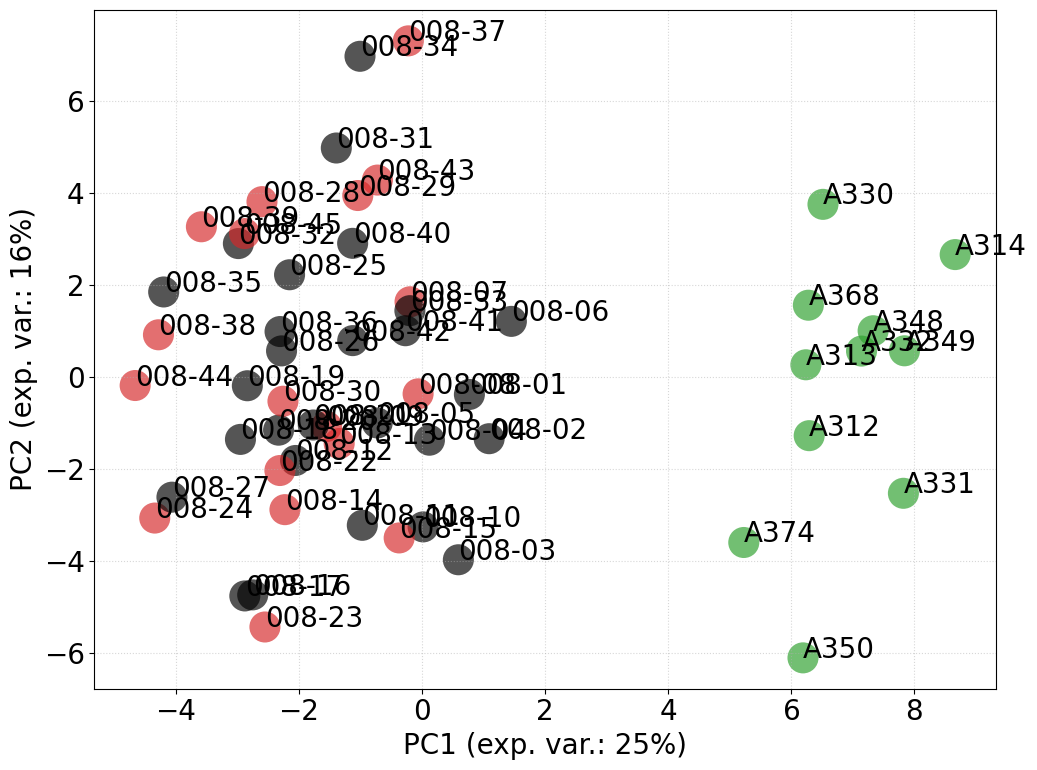

In [21]:
wdf = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(wdf)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    label = wdf.index[i]
    
    #
    # treatment
    #
    if 'A' in label:
        treatment = 'TNF'
    else:
        treatment = metadata.loc[label, 'µM catech']
        
    if treatment == 'TNF':
        the_color = 'tab:green'
    elif treatment == 0:
        the_color = 'black'
    elif treatment == 5:
        the_color = 'tab:red'
    else:
        print(treatment)
        raise ValueError('unknown treatment')
    
    
    print(i, label, treatment, the_color)
    
    matplotlib.pyplot.scatter(locations[i, 0], locations[i, 1], s=500, c=the_color, marker='o', alpha=2/3, edgecolors='none')
    matplotlib.pyplot.text(locations[i, 0], locations[i, 1], label)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [12]:
# pca on samples
# subset specific samples for heatmap
# statistical tests for particular conditions
# heatmap of only differential variables, one heatmap for lipids, another for metabolites